In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import warnings
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
warnings.filterwarnings("ignore")

In [2]:
tf.config.list_physical_devices(
    device_type=None
)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
train_path = "D:\\MalariaDetection\\Cell_Images\\cell_images\\train"
test_path  = "D:\\MalariaDetection\\Cell_Images\\cell_images\\test"

In [4]:
image_shape = (130, 130, 3)

In [5]:
image_gen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1 ,
                               shear_range=0.1, zoom_range=0.1, horizontal_flip=True, fill_mode = 'nearest')

In [6]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [7]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [8]:
train_image_gen = image_gen.flow_from_directory(train_path, target_size=image_shape[:2], color_mode='rgb', batch_size=64, class_mode='binary')

Found 24958 images belonging to 2 classes.


In [9]:
test_image_gen = image_gen.flow_from_directory(test_path, target_size=image_shape[:2], color_mode='rgb', batch_size=64, class_mode='binary',
                                               shuffle=False)

Found 2600 images belonging to 2 classes.


In [10]:
EfficientNetB7_model = Sequential()

pretrained_model= tf.keras.applications.EfficientNetB7(include_top=False,
                   input_shape=image_shape,
                   pooling='max',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

EfficientNetB7_model.add(pretrained_model)

EfficientNetB7_model.add(Flatten())
EfficientNetB7_model.add(Dense(128, activation='relu'))
EfficientNetB7_model.add(Dense(1, activation='sigmoid'))

In [11]:
EfficientNetB7_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb7 (Functional)  (None, 2560)             64097687  
                                                                 
 flatten (Flatten)           (None, 2560)              0         
                                                                 
 dense (Dense)               (None, 128)               327808    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 64,425,624
Trainable params: 327,937
Non-trainable params: 64,097,687
_________________________________________________________________


In [12]:
EfficientNetB7_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
early_stop = EarlyStopping(monitor='val_loss', patience=30)

In [14]:
EfficientNetB7_model.fit(train_image_gen, epochs=100, validation_data=test_image_gen, callbacks=[early_stop])

Epoch 1/100
390/390 [==============================] - 158s 357ms/step - loss: 0.2703 - accuracy: 0.8987 - val_loss: 0.2200 - val_accuracy: 0.9158
Epoch 2/100
390/390 [==============================] - 135s 347ms/step - loss: 0.2041 - accuracy: 0.9231 - val_loss: 0.1895 - val_accuracy: 0.9327
Epoch 3/100
390/390 [==============================] - 135s 347ms/step - loss: 0.1927 - accuracy: 0.9266 - val_loss: 0.1841 - val_accuracy: 0.9365
Epoch 4/100
390/390 [==============================] - 135s 347ms/step - loss: 0.1950 - accuracy: 0.9276 - val_loss: 0.1804 - val_accuracy: 0.9308
Epoch 5/100
390/390 [==============================] - 135s 347ms/step - loss: 0.1772 - accuracy: 0.9339 - val_loss: 0.2131 - val_accuracy: 0.9154
Epoch 6/100
390/390 [==============================] - 136s 348ms/step - loss: 0.1761 - accuracy: 0.9342 - val_loss: 0.1656 - val_accuracy: 0.9415
Epoch 7/100
390/390 [==============================] - 136s 348ms/step - loss: 0.1831 - accuracy: 0.9312 - val_loss: 0

390/390 [==============================] - 136s 348ms/step - loss: 0.1421 - accuracy: 0.9469 - val_loss: 0.1442 - val_accuracy: 0.9469
Epoch 57/100
390/390 [==============================] - 136s 348ms/step - loss: 0.1447 - accuracy: 0.9443 - val_loss: 0.1507 - val_accuracy: 0.9473
Epoch 58/100
390/390 [==============================] - 136s 348ms/step - loss: 0.1426 - accuracy: 0.9460 - val_loss: 0.1635 - val_accuracy: 0.9404
Epoch 59/100
390/390 [==============================] - 136s 348ms/step - loss: 0.1403 - accuracy: 0.9482 - val_loss: 0.1503 - val_accuracy: 0.9462
Epoch 60/100
390/390 [==============================] - 136s 348ms/step - loss: 0.1447 - accuracy: 0.9455 - val_loss: 0.1485 - val_accuracy: 0.9435
Epoch 61/100
390/390 [==============================] - 136s 348ms/step - loss: 0.1379 - accuracy: 0.9490 - val_loss: 0.1524 - val_accuracy: 0.9465
Epoch 62/100
390/390 [==============================] - 136s 348ms/step - loss: 0.1393 - accuracy: 0.9466 - val_loss: 0.1351 

In [15]:
history = pd.DataFrame(EfficientNetB7_model.history.history)

In [16]:
history.head()

,loss,accuracy,val_loss,val_accuracy
0,0.270282,0.898670,0.220036,0.915769
1,0.204092,0.923111,0.189526,0.932692
2,0.192661,0.926557,0.184071,0.936538
3,0.194970,0.927598,0.180366,0.930769
4,0.177172,0.933889,0.213081,0.915385


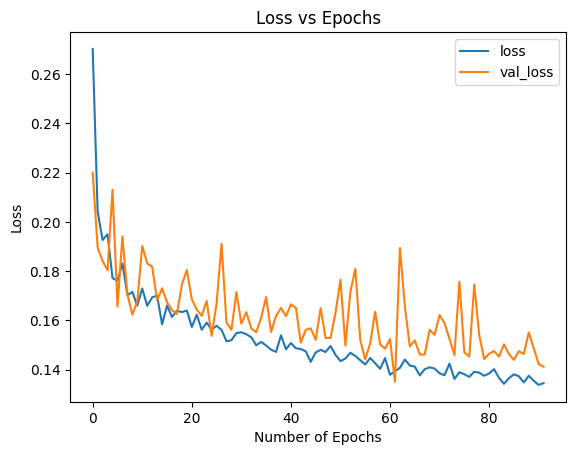

In [17]:
history[["loss", "val_loss"]].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.savefig('LossVsEpochsENB7.png')
plt.show()

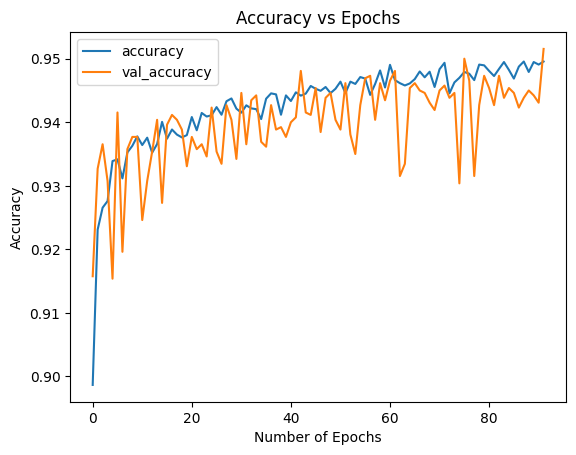

In [18]:
history[['accuracy', 'val_accuracy']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs")
plt.savefig('AccuracyvsEpochsENB7.png')
plt.show()

In [19]:
predictions = EfficientNetB7_model.predict(test_image_gen)

41/41 [==============================] - 16s 301ms/step


In [20]:
predictions = predictions >= 0.5

In [21]:
print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1300
           1       0.95      0.95      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



In [22]:
confusion_matrix(test_image_gen.classes, predictions)

array([[1231,   69],
       [  70, 1230]], dtype=int64)

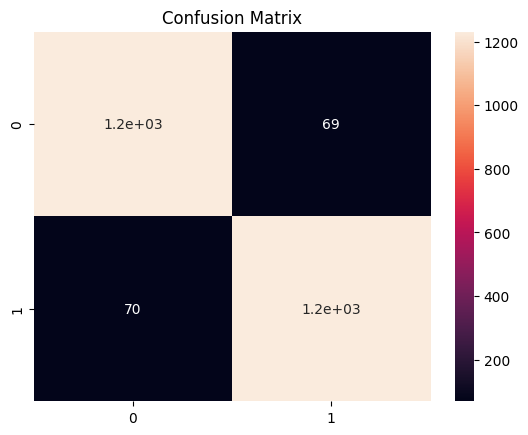

In [23]:
import seaborn as sns
DetaFrame_cm = pd.DataFrame(confusion_matrix(test_image_gen.classes, predictions), range(2), range(2))
sns.heatmap(DetaFrame_cm, annot=True)
plt.title("Confusion Matrix")
plt.savefig('ConfusionMatrixHeatmapENB7.png')
plt.show()